<a href="https://colab.research.google.com/github/amolprabhu/Hotel_Booking_Analysis/blob/main/Amol_Prabhu_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
# importing data and saving into a variable called 'data'
data = pd.read_csv('/content/drive/MyDrive/Alma Better/Hotel Booking Analysis/Hotel Bookings.csv')

In [6]:
# understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [40]:
# creating a function to convert binary data of canceled column to 'no' and 'yes'
def cancel(rows):
  """ function takes in rows as input as converts 0 and 1 
      values to NO and YES respectively """
  if rows == 0:
    return 'NO'
  else:
    return "YES"

In [9]:
# applying function on the column
data['is_canceled'] = data['is_canceled'].apply(cancel)

In [10]:
# seeing the counts of cancelled and not cancelled
data['is_canceled'].value_counts()

NO     75166
YES    44224
Name: is_canceled, dtype: int64

In [11]:
# Chceking for null values in the data
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
data['children'].median()

0.0

In [13]:
# Filling 4 na values of children with median of children
data.loc[data['children'].isna(),'children'] = data['children'].median()

In [14]:
# checking na values after filling na values in children column
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
# types of hotels and their counts
data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

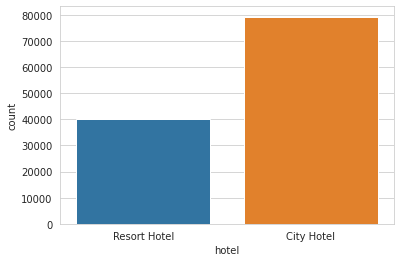

In [16]:
# types of hotels and their counts
sns.set_style('whitegrid')
sns.countplot(data = data, x = 'hotel')

Text(0.5, 1.0, 'YEARLY HOTEL BOOKINGS')

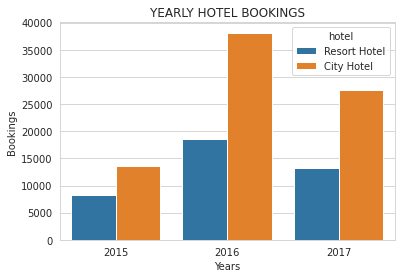

In [17]:
# Year wise and hotel wise booking
sns.countplot(data=data, x = data['arrival_date_year'], hue = data['hotel'])
plt.xlabel('Years')
plt.ylabel('Bookings')
plt.title('YEARLY HOTEL BOOKINGS')

In [18]:
# showing most busy months or holiday seasons globally
monthly_bookings = data['arrival_date_month'].value_counts()

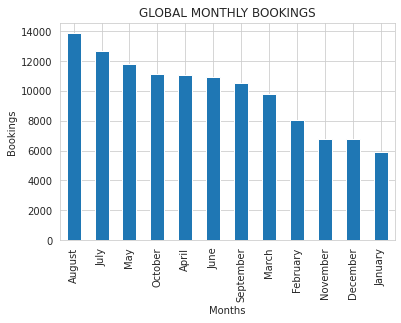

In [19]:
# graphical representation of monthly bookings globally
monthly_bookings.plot(kind='bar')
plt.rcParams['figure.figsize'] = (8,5)
plt.xlabel('Months')
plt.ylabel('Bookings')
plt.title('GLOBAL MONTHLY BOOKINGS')
plt.grid(b=True)


In [20]:
# number of adults, children and babies booking yearly and monthly
data.groupby(['arrival_date_year','arrival_date_month']).agg({'adults':'sum','children':'sum','babies':'sum'})

adults  children  babies
arrival_date_year arrival_date_month                          
2015              August                7545     428.0      67
                  December              5208     216.0      46
                  July                  5423     266.0      26
                  November              3714      72.0      21
                  October               8860     192.0      32
                  September             9512     183.0      31
2016              April                 9994     453.0      24
                  August               10351    1168.0      81
                  December              7174     520.0      32
                  February              6866     322.0      27
                  January               3696     116.0      23
                  July                  9118     924.0      59
                  June                  9637     423.0      41
                  March                 8784     443.0      34
                  May                   9982     406.0      32
                  November              7774     207.0      24
                  October              11419     511.0      30
                  September            10169     415.0      56
2017              April                10812     688.0      29
                  August                9899    1184.0      48
                  February              7584     468.0      32
                  January               6328     336.0      25
                  July                 10623    1132.0      36
                  June                 10716     634.0      30
                  March                 8891     257.0      23
                  May                  11557     439.0      40

In [21]:
# Average lead time for bookings of hotels globally
sum(data['lead_time'])/data['lead_time'].count()

104.01141636652986

In [22]:
# Type of meal preferred globally
global_meals = data['meal'].value_counts()

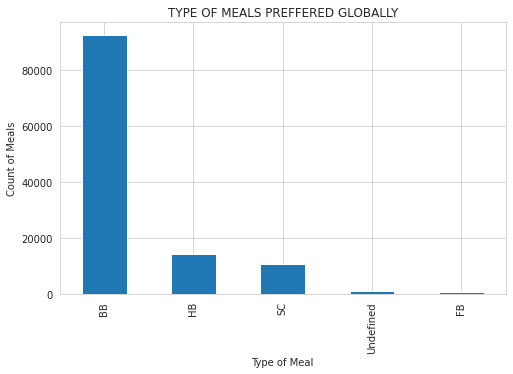

In [23]:
# Graph showing type of meals preffered globally
global_meals.plot(kind='bar')
plt.xlabel('Type of Meal')
plt.ylabel('Count of Meals')
plt.title('TYPE OF MEALS PREFFERED GLOBALLY')
plt.grid(b=True)

In [24]:
# Filetering the main dataset to extract only the data which have country information
no_na_countries = data.loc[~data['country'].isna()]

In [25]:
# Countries with weekend and weekday bookings
global_stays = no_na_countries.groupby('country').agg({'stays_in_weekend_nights':'sum','stays_in_week_nights':'sum'})

In [26]:
# country with highest weekend stay bookings
global_stays.sort_values('stays_in_weekend_nights',ascending=False).head()

,stays_in_weekend_nights,stays_in_week_nights
country,,
PRT,35908,105746
GBR,16297,41795
FRA,10130,26417
DEU,7134,18653
ESP,7106,19252


In [27]:
#Understanding the method of bookings used
data['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [28]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,NO,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,NO,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,NO,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,NO,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,NO,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [39]:
#Checking cancellation rates in different months
data[data['is_canceled']=="YES"].groupby(['is_canceled','arrival_date_month'])['arrival_date_month'].count().sort_values()

is_canceled  arrival_date_month
YES          January               1807
             November              2122
             December              2371
             February              2696
             March                 3149
             September             4116
             October               4246
             April                 4524
             June                  4535
             May                   4677
             July                  4742
             August                5239
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'ARRIVAL YEAR WITH MARKET SEGMENTS')

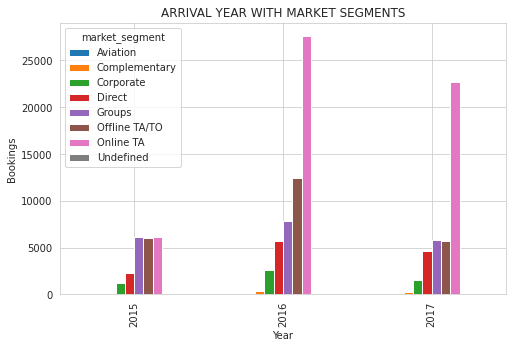

In [30]:
# Graph showing different market segments for every year
data.groupby(['arrival_date_year','market_segment'])['market_segment'].count().unstack().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Bookings')
plt.title('ARRIVAL YEAR WITH MARKET SEGMENTS')

In [31]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,NO,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,NO,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,NO,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,NO,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,NO,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [32]:
# filtering out hotels in India
indian_hotels = data[data['country'] == "IND"]

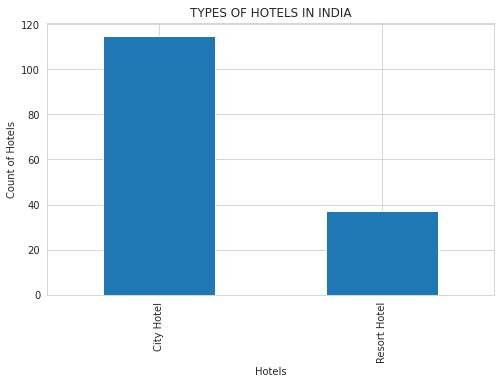

In [33]:
# different types of hotels in India
indian_hotels['hotel'].value_counts().plot(kind='bar')
plt.xlabel('Hotels')
plt.ylabel('Count of Hotels')
plt.title('TYPES OF HOTELS IN INDIA')
plt.grid(b=True)

In [34]:
# Busiest time for hotel bookings in India
indian_hotels['arrival_date_month'].value_counts()

November     27
April        24
May          22
July         14
June         13
October      11
December      9
September     8
March         8
February      7
January       6
August        3
Name: arrival_date_month, dtype: int64

In [35]:
# cancelations of bookings in India
india_booking_cancel = indian_hotels.loc[indian_hotels['is_canceled'] == "YES", 'is_canceled'].count()

In [36]:
# cancelation rate of bookings in India

# total bookings in India
india_total_booking = indian_hotels['is_canceled'].count()

# cancelation rate
print(india_booking_cancel/india_total_booking*100)

23.026315789473685


In [37]:
indian_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
937,Resort Hotel,NO,4,2015,August,32,7,0,2,2,1.0,0,BB,IND,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,240.0,NaN,0,Transient,226.0,0,4,Check-Out,2015-08-09
1791,Resort Hotel,NO,11,2015,September,38,14,1,2,2,2.0,0,BB,IND,Online TA,TA/TO,0,0,0,H,H,0,No Deposit,240.0,NaN,0,Transient,160.0,0,0,Check-Out,2015-09-17
2541,Resort Hotel,NO,40,2015,October,43,21,0,3,2,0.0,0,BB,IND,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,56.0,1,3,Check-Out,2015-10-24
6766,Resort Hotel,YES,62,2016,July,27,1,0,2,2,2.0,0,BB,IND,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,220.0,0,0,Canceled,2016-05-01
7071,Resort Hotel,YES,17,2016,July,30,19,0,3,2,0.0,0,BB,IND,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,191.0,0,0,Canceled,2016-07-02


In [38]:
# Average lead time for hotel bookings in India
sum(indian_hotels['lead_time'])/indian_hotels['lead_time'].count()

48.89473684210526